In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from sympy import solve, linsolve, symbols, Matrix, Eq
import ipywidgets as widgets
from scipy.linalg import expm

In [89]:
def X_DoVP(y_X_KK, y_X_f, y_X_r, G_X_K, G_X_Kprime):
    X_DoVP = 1/(1+2*y_X_KK/(2*y_X_f+y_X_r)) * (G_X_K-G_X_Kprime)/(G_X_K+G_X_Kprime)
    return X_DoVP

def T_inter_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime):
    T_inter_DoVP = 1/(1+2*y_T_KK_inter/(y_T_ex_KK+y_T_f+y_T_r)) * X_DoVP(y_X_KK, y_X_f, y_X_r, G_X_K, G_X_Kprime)
    return T_inter_DoVP

def T_intra_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime):
    alpha = (y_T_ex_KK+y_T_f)/(2*y_T_ex_KK+2*y_T_f+y_T_r)
    T_intra_DoVP = 1/(1+2*y_T_KK_intra/y_T_r) * ( (1-alpha)*X_DoVP(y_X_KK, y_X_f, y_X_r, G_X_K, G_X_Kprime)+(alpha-2*y_T_ex_KK/(2*y_T_ex_KK+2*y_T_f+y_T_r))*T_inter_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime))
    return T_intra_DoVP

def T_tot_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime):
    T_tot_DoVP = 1/(1+2*y_T_KK_intra/y_T_r) * (y_T_KK_intra+y_T_KK_inter+y_T_f+y_T_r)/(y_T_ex_KK+2*y_T_KK_inter+y_T_f+y_T_r) * X_DoVP(y_X_KK, y_X_f, y_X_r, G_X_K, G_X_Kprime)
    return T_tot_DoVP

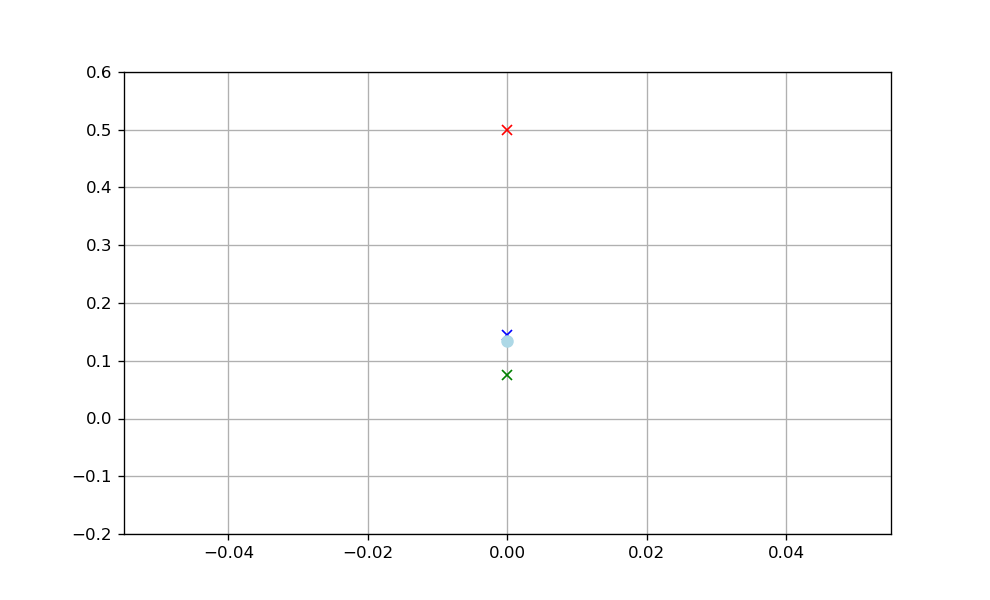

In [247]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_X_r = 1
    
ax.cla()

G_X_K        = 0.2
G_X_Kprime   = 0
y_X_KK       = 1/1
y_X_f        = 1/2
y_X_r        = 1/1
y_T_KK_inter = 1/200
y_T_ex_KK    = 1/4
y_T_f        = 0
y_T_r        = 1/10
y_T_KK_intra = 1/25

#數值解
A = np.array([[-(y_X_KK+2*y_X_f+y_X_r), y_X_KK, 0, 0, 0, 0],
             [y_X_KK, -(y_X_KK+2*y_X_f+y_X_r), 0, 0, 0, 0],
             [y_X_f, 0, -(y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r), y_T_KK_inter, 0, 0],
             [0, y_X_f, y_T_KK_inter, -(y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r), 0, 0],
             [y_X_f, 0, y_T_f, y_T_ex_KK, -(y_T_KK_intra+y_T_r), y_T_KK_intra],
             [0, y_X_f, y_T_ex_KK, y_T_f, y_T_KK_intra, -(y_T_KK_intra+y_T_r)]])
G = np.array([G_X_K, G_X_Kprime, 0, 0, 0, 0])
ans = np.linalg.inv(A).dot(-G)
 
globals()['X']       = [(ans[0]-ans[1])/(ans[0]+ans[1])]
globals()['T_inter'] = [(ans[2]-ans[3])/(ans[2]+ans[3])]
globals()['T_intra'] = [(ans[4]-ans[5])/(ans[4]+ans[5])]
globals()['T_tot']   = [(ans[2]+ans[4]-ans[3]-ans[5])/(ans[2]+ans[4]+ans[3]+ans[5])]

#繪製數值解
Markersiz = 6.5
ax.plot( 0, globals()['X'], marker='x'      , linestyle='dotted', markersize=Markersiz  , color='r'             , linewidth=1, zorder=2)
ax.plot( 0, globals()['T_inter'], marker='x', linestyle='dotted', markersize=Markersiz  , color='green'         , linewidth=1, zorder=2)
ax.plot( 0, globals()['T_intra'], marker='x', linestyle='dotted', markersize=Markersiz  , color='blue'          , linewidth=1, zorder=2)
ax.plot( 0, globals()['T_tot'], marker='o'  , linestyle='dotted', markersize=Markersiz  , color='lightblue'     , linewidth=1, zorder=2)
# ax.plot( 0, X_DoVP(y_X_KK, y_X_f, y_X_r, G_X_K, G_X_Kprime)                                                           , marker='X', linestyle='dotted', markersize=Markersiz+4, color='r'           , markeredgecolor='k', linewidth=1, zorder=2)
# ax.plot( 0, T_inter_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime), marker='X', linestyle='dotted', markersize=Markersiz+2, color='mediumseagreen', markeredgecolor='k', linewidth=1, zorder=2)
# ax.plot( 0, T_intra_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime), marker='X', linestyle='dotted', markersize=Markersiz  , color='y'             , markeredgecolor='k', linewidth=1, zorder=2)
# ax.plot( 0, T_tot_DoVP(y_X_KK, y_X_f, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime)  , marker='x', linestyle='dotted', markersize=Markersiz  , color='k'             , markeredgecolor='k', linewidth=1, zorder=2)

# for j, v in enumerate(globals()['TR']):
#     ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)

#圖片設置
ax.grid()
ax.set_ylim(-0.2, 0.6)
# ax.legend(['numerical $η^{X}$', 'numerical $η^{T,inter}$','numerical $η^{T,intra}$','numerical $η^{T,tot}$', 'analytic $η^{X}$', 'analytic $η^{T,inter}$','analytic $η^{T,intra}$','analytic $η^{T,tot}$'], fontsize=12, loc='lower left')
# ax.tick_params(axis='both', which='major', labelsize=20)

# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.975, bottom=0.05, wspace=0.4, hspace=0.028)
plt.show()

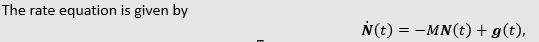

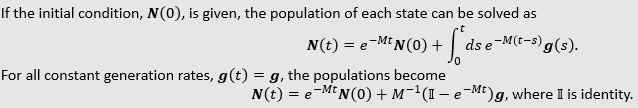

A :  [[-3.    1.    0.    0.    0.    0.  ]
 [ 1.   -3.    0.    0.    0.    0.  ]
 [ 0.5   0.   -1.35  1.    0.    0.  ]
 [ 0.    0.5   1.   -1.35  0.    0.  ]
 [ 0.5   0.    0.    0.25 -0.14  0.04]
 [ 0.    0.5   0.25  0.    0.04 -0.14]]
G :  [0.2 0.  0.  0.  0.  0. ]


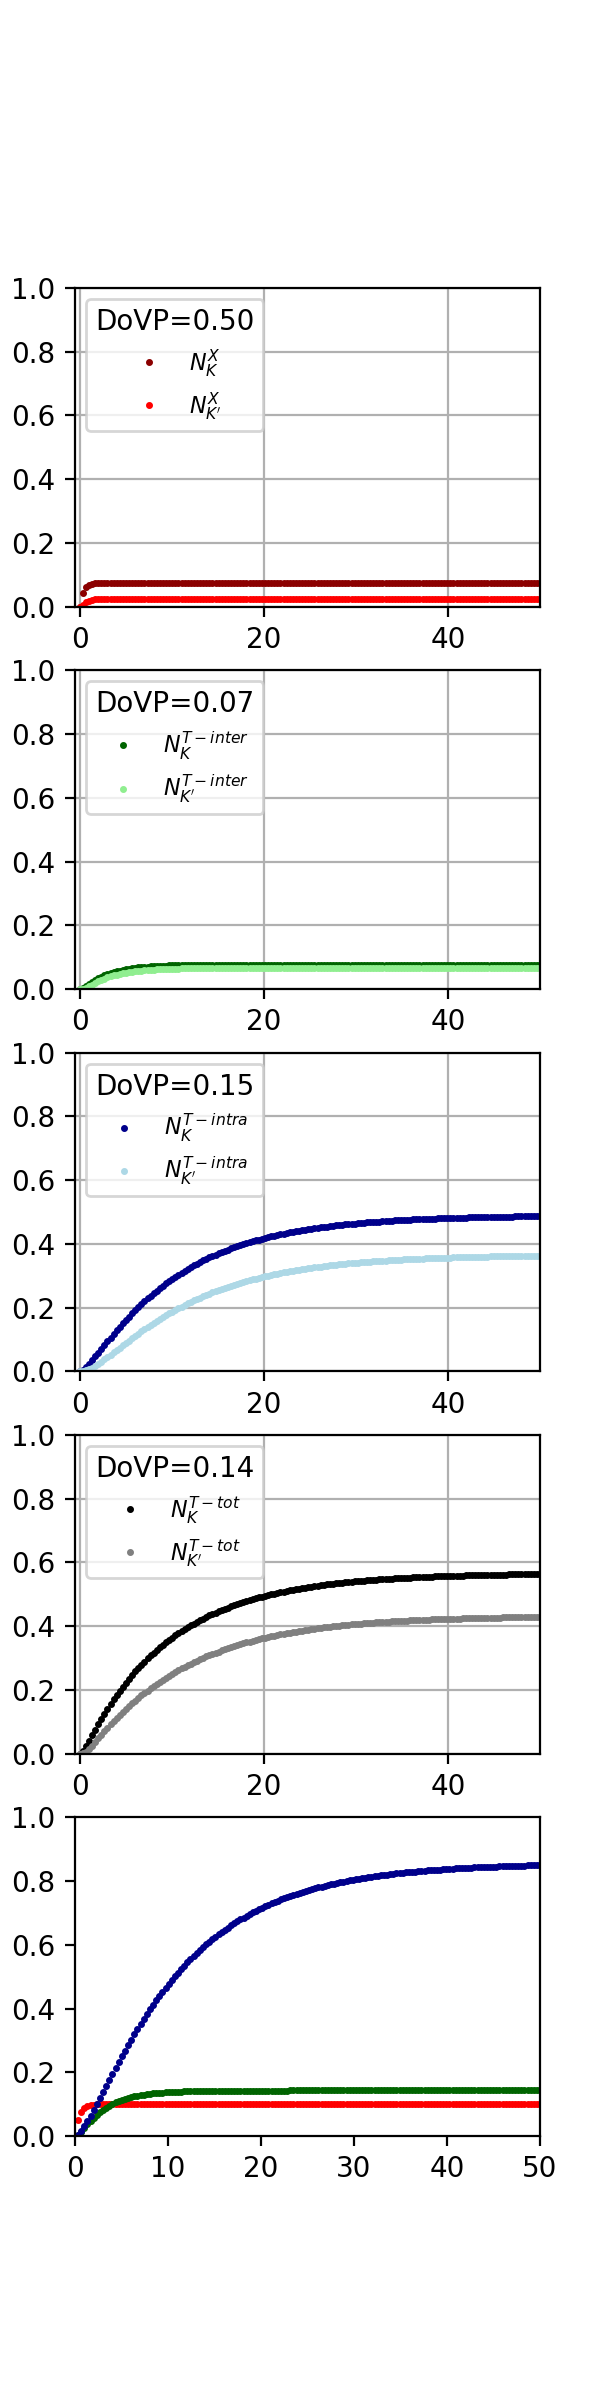

In [248]:
fig, ax = plt.subplots(5, 1,figsize=(3, 12), dpi=200)
print("A : ",A)
print("G : ",G)

globals()['N_X_K']            = []
globals()['N_X_Kprime']       = []
globals()['N_T_inter_K']      = []
globals()['N_T_inter_Kprime'] = []
globals()['N_T_intra_K']      = []
globals()['N_T_intra_Kprime'] = []
globals()['N_T_tot_K']        = []
globals()['N_T_tot_Kprime']   = []
globals()['N_X']              = []
globals()['N_T_inter']        = []
globals()['N_T_intra']        = []

number = 150
t = np.linspace(0, 50, number)
for T in t:    
    N = np.dot(np.linalg.inv(-A), np.dot( (np.eye(6)-expm(A*T)), G) )
    globals()['N_X_K']            += [N[0]]
    globals()['N_X_Kprime']       += [N[1]]
    globals()['N_T_inter_K']      += [N[2]]
    globals()['N_T_inter_Kprime'] += [N[3]]
    globals()['N_T_intra_K']      += [N[4]]
    globals()['N_T_intra_Kprime'] += [N[5]]
    globals()['N_T_tot_K']        += [N[2]+N[4]]
    globals()['N_T_tot_Kprime']   += [N[3]+N[5]]
    globals()['N_X']              += [N[0]+N[1]]
    globals()['N_T_inter']        += [N[2]+N[3]]
    globals()['N_T_intra']        += [N[4]+N[5]]

# print(globals()['N_X_K'])          
# print(globals()['N_X_Kprime'])       
# print(globals()['N_T_inter_K'])     
# print(globals()['N_T_inter_Kprime'])
# print(globals()['N_T_intra_K'])      
# print(globals()['N_T_intra_Kprime'])
# print(globals()['N_T_tot_K'])        
# print(globals()['N_T_tot_Kprime'])
Markersiz = 3
ax[0].plot( t, globals()['N_X_K'], marker='.'            , markersize=Markersiz, color='darkred'     , linewidth=0, zorder=2, label="$N^{X}_{K}$")
ax[0].plot( t, globals()['N_X_Kprime'], marker='.'       , markersize=Markersiz, color='red'         , linewidth=0, zorder=2, label="$N^{X}_{K\'}$")
ax[1].plot( t, globals()['N_T_inter_K'], marker='.'      , markersize=Markersiz, color='darkgreen'   , linewidth=0, zorder=2, label="$N^{T-inter}_{K}$")
ax[1].plot( t, globals()['N_T_inter_Kprime'], marker='.' , markersize=Markersiz, color='lightgreen'  , linewidth=0, zorder=2, label="$N^{T-inter}_{K\'}$")
ax[2].plot( t, globals()['N_T_intra_K'], marker='.'      , markersize=Markersiz, color='darkblue'    , linewidth=0, zorder=2, label="$N^{T-intra}_{K}$")
ax[2].plot( t, globals()['N_T_intra_Kprime'], marker='.' , markersize=Markersiz, color='lightblue'   , linewidth=0, zorder=2, label="$N^{T-intra}_{K\'}$")
ax[3].plot( t, globals()['N_T_tot_K'], marker='.'        , markersize=Markersiz, color='k'           , linewidth=0, zorder=2, label="$N^{T-tot}_{K}$")
ax[3].plot( t, globals()['N_T_tot_Kprime'], marker='.'   , markersize=Markersiz, color='gray'        , linewidth=0, zorder=2, label="$N^{T-tot}_{K\'}$")
ax[4].plot( t, globals()['N_X'], marker='.'              , markersize=Markersiz, color='red'         , linewidth=0, zorder=2, label="$N^{X}_{K}$+$N^{X}_{K\'}$")
ax[4].plot( t, globals()['N_T_inter'], marker='.'        , markersize=Markersiz, color='darkgreen'   , linewidth=0, zorder=2, label="$N^{T_2}_{K}$+$N^{T_2}_{K\'}$")
ax[4].plot( t, globals()['N_T_intra'], marker='.'        , markersize=Markersiz, color='darkblue'    , linewidth=0, zorder=2, label="$N^{T_1}_{K}$+$N^{T_1}_{K\'}$")

def DoVP(i):
    if i == 0:
        return (globals()['N_X_K'][number-1]-globals()['N_X_Kprime'][number-1])/(globals()['N_X_K'][number-1]+globals()['N_X_Kprime'][number-1])
    if i == 1:
        return (globals()['N_T_inter_K'][number-1]-globals()['N_T_inter_Kprime'][number-1])/(globals()['N_T_inter_K'][number-1]+globals()['N_T_inter_Kprime'][number-1])
    if i == 2:
        return (globals()['N_T_intra_K'][number-1]-globals()['N_T_intra_Kprime'][number-1])/(globals()['N_T_intra_K'][number-1]+globals()['N_T_intra_Kprime'][number-1])
    if i == 3:
        return (globals()['N_T_inter_K'][number-1]+globals()['N_T_intra_K'][number-1]-globals()['N_T_inter_Kprime'][number-1]-globals()['N_T_intra_Kprime'][number-1])/(globals()['N_T_inter_K'][number-1]+globals()['N_T_intra_K'][number-1]+globals()['N_T_inter_Kprime'][number-1]+globals()['N_T_intra_Kprime'][number-1])

for i in range(4):
    ax[i].legend(fontsize=8, loc='upper left', title='DoVP='+str(format(DoVP(i),'.2f')) )
    ax[i].grid()
    ax[i].set_xlim(-0.5, 50)
    ax[i].set_ylim(0, 1)
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    
# ax[4].set_xlabel('t (ps)', fontsize=10)
# ax[4].grid()
ax[4].set_xlim(0, 50)
ax[4].set_ylim(0, 1)
ax[4].tick_params(axis='both', which='major', labelsize=10)
# ax[4].legend(fontsize=8, loc='upper left')

In [77]:
T=0.0001
N = np.dot(np.linalg.inv(-A), np.dot( (np.eye(6)-expm(A*T)), G) )
print(N)
print((N[0]-N[1])/(N[0]+N[1]))
print((N[2]-N[3])/(N[2]+N[3]))
print((N[4]-N[5])/(N[4]+N[5]))
print((N[2]+N[4]-N[3]-N[5])/(N[2]+N[4]+N[3]+N[5]))

[1.99966671e-05 9.99777806e-10 6.66584818e-10 2.22171490e-14
 6.66590361e-10 2.77595601e-14]
0.999900010554895
0.9999333425907216
0.9999167152550295
0.9999250288537537


In [35]:
T=20
N = np.dot(np.linalg.inv(-A), np.dot( (np.eye(6)-expm(A*T)), G) )
print(N)
print((N[0]-N[1])/(N[0]+N[1]))
print((N[2]-N[3])/(N[2]+N[3]))
print((N[4]-N[5])/(N[4]+N[5]))
print((N[2]+N[4]-N[3]-N[5])/(N[2]+N[4]+N[3]+N[5]))

[0.21818182 0.08181818 0.24934759 0.09350503 0.49047342 0.36476501]
0.45454545454545603
0.4545468159221066
0.14698638647519102
0.23499964644259508


In [36]:
N = -np.dot(np.linalg.inv(A), G)
print(N)
print((N[0]-N[1])/(N[0]+N[1]))
print((N[2]-N[3])/(N[2]+N[3]))
print((N[4]-N[5])/(N[4]+N[5]))
print((N[2]+N[4]-N[3]-N[5])/(N[2]+N[4]+N[3]+N[5]))

[0.21818182 0.08181818 0.24935065 0.09350649 0.49141181 0.36573104]
0.45454545454545453
0.4545454545454546
0.14662756598240478
0.23460410557184758


In [127]:
T=20
N = np.dot(np.linalg.inv(-A), np.dot( (np.eye(6)-expm(A*T)), G) )  -  (-np.dot(np.linalg.inv(A), G))
print(N)

[ 0.00000000e+00  0.00000000e+00 -1.18181539e-04 -5.55102639e-05
 -7.74587342e-02 -7.90715862e-02]


In [239]:
def X_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, G_X_K, G_X_Kprime):
    X_DoVP = 1/(1+2*y_X_KK/(y_X_f_1+y_X_f_2+y_X_r)) * (G_X_K-G_X_Kprime)/(G_X_K+G_X_Kprime)
    return X_DoVP

def T_inter_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime):
    T_inter_DoVP = 1/(1+2*y_T_KK_inter/(y_T_ex_KK+y_T_f+y_T_r)) * X_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, G_X_K, G_X_Kprime)
    return T_inter_DoVP

def T_intra_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime):
    alpha_1 = (y_T_ex_KK+y_T_f+y_T_r)*y_X_f_2 / ((y_T_ex_KK+y_T_f+y_T_r)*y_X_f_2+(y_T_ex_KK+y_T_f)*y_X_f_1)
    alpha_2 = (y_T_f-y_T_ex_KK)*y_X_f_1       / ((y_T_ex_KK+y_T_f+y_T_r)*y_X_f_2+(y_T_ex_KK+y_T_f)*y_X_f_1)
    T_intra_DoVP = 1/(1+2*y_T_KK_intra/y_T_r) * ( alpha_1*X_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, G_X_K, G_X_Kprime)+alpha_2*T_inter_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime))
    return T_intra_DoVP

def T_tot_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime):
    T_tot_DoVP = 1/(1+2*y_T_KK_intra/y_T_r) * ((y_X_f_1+y_X_f_2)*(y_T_f+y_T_r)+(y_X_f_2-y_X_f_1)*y_T_ex_KK+2*(y_T_KK_intra*y_X_f_1+y_T_KK_inter*y_X_f_2))/((2*y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r)*(y_X_f_1+y_X_f_2)) * X_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, G_X_K, G_X_Kprime)
    return T_tot_DoVP

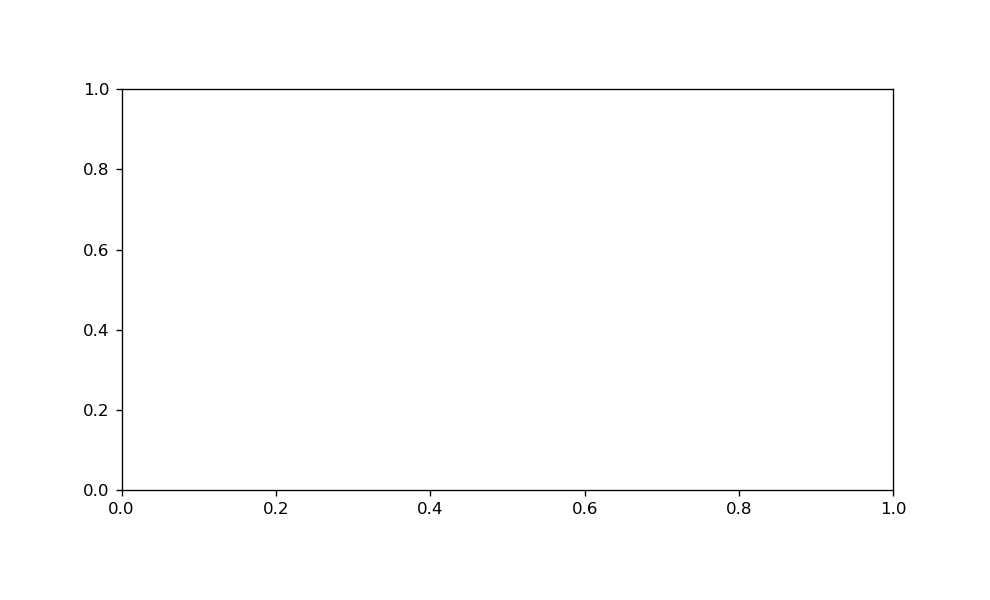

Output()

In [246]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)
y_X_KK       = widgets.FloatSlider(value=1/1    , min=0., max=2, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_KK')
y_X_f_1      = widgets.FloatSlider(value=1/2  , min=0., max=2, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_f_1')
y_X_f_2      = widgets.FloatSlider(value=1/2  , min=0., max=2, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_f_2')
y_X_r        = widgets.FloatSlider(value=1/1    , min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_r')
y_T_KK_inter = widgets.FloatSlider(value=1/200  , min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KK_inter')
y_T_ex_KK    = widgets.FloatSlider(value=1/4    , min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_ex_KK')
y_T_f        = widgets.FloatSlider(value=0      , min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_f')
y_T_r        = widgets.FloatSlider(value=1/10   , min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_r')
y_T_KK_intra = widgets.FloatSlider(value=1/25   , min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KK_intra')

def need(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra):
    ax.cla()
    G_X_K        = 0.65
    G_X_Kprime   = 0
        
    #數值解
    A = np.array([[-(y_X_KK+y_X_f_1+y_X_f_2+y_X_r), y_X_KK, 0, 0, 0, 0],
                 [y_X_KK, -(y_X_KK+y_X_f_1+y_X_f_2+y_X_r), 0, 0, 0, 0],
                 [y_X_f_2, 0, -(y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r), y_T_KK_inter, 0, 0],
                 [0, y_X_f_2, y_T_KK_inter, -(y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r), 0, 0],
                 [y_X_f_1, 0, y_T_f, y_T_ex_KK, -(y_T_KK_intra+y_T_r), y_T_KK_intra],
                 [0, y_X_f_1, y_T_ex_KK, y_T_f, y_T_KK_intra, -(y_T_KK_intra+y_T_r)]])
    G = np.array([G_X_K, G_X_Kprime, 0, 0, 0, 0])
    ans = np.linalg.inv(A).dot(-G)

    globals()['X']       = [(ans[0]-ans[1])/(ans[0]+ans[1])]
    globals()['T_inter'] = [(ans[2]-ans[3])/(ans[2]+ans[3])]
    globals()['T_intra'] = [(ans[4]-ans[5])/(ans[4]+ans[5])]
    globals()['T_tot']   = [(ans[2]+ans[4]-ans[3]-ans[5])/(ans[2]+ans[4]+ans[3]+ans[5])]
    print(globals()['X'], globals()['T_inter'], globals()['T_tot'], globals()['T_intra'])

    #繪製數值解
    Markersiz = 6.5
    ax.plot( 0, globals()['X'], marker='o'      , linestyle='dotted', markersize=Markersiz+4, color='r'           , linewidth=1, zorder=2)
    ax.plot( 0, globals()['T_inter'], marker='o', linestyle='dotted', markersize=Markersiz+2, color='green'       , linewidth=1, zorder=2)
    ax.plot( 0, globals()['T_intra'], marker='o', linestyle='dotted', markersize=Markersiz  , color='darkblue'    , linewidth=1, zorder=2)
    ax.plot( 0, globals()['T_tot'], marker='.'  , linestyle='dotted', markersize=Markersiz  , color='k'           , linewidth=1, zorder=2)
    # ax.plot( 0, X_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, G_X_K, G_X_Kprime)                                                           , marker='X', linestyle='dotted', markersize=Markersiz+4, color='r'           , markeredgecolor='k', linewidth=1, zorder=2)
    # ax.plot( 0, T_inter_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime), marker='X', linestyle='dotted', markersize=Markersiz+2, color='mediumseagreen', markeredgecolor='k', linewidth=1, zorder=2)
    # ax.plot( 0, T_intra_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime), marker='X', linestyle='dotted', markersize=Markersiz  , color='y'             , markeredgecolor='k', linewidth=1, zorder=2)
    # ax.plot( 0, T_tot_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime)  , marker='x', linestyle='dotted', markersize=Markersiz  , color='k'             , markeredgecolor='k', linewidth=1, zorder=2)

    #圖片設置
    ax.grid()
    ax.set_ylim(-0.5, 1)
    # ax.legend(['numerical $η^{X}$', 'numerical $η^{T,inter}$','numerical $η^{T,intra}$','numerical $η^{T,tot}$', 'analytic $η^{X}$', 'analytic $η^{T,inter}$','analytic $η^{T,intra}$','analytic $η^{T,tot}$'], fontsize=12, loc='lower left')
    
    
    print(2*y_T_KK_inter/(y_T_ex_KK+y_T_f+y_T_r))
    print(1/(1+2*y_T_KK_intra/y_T_r))
    alpha_1 = (y_T_ex_KK+y_T_f+y_T_r)*y_X_f_2 / ((y_T_ex_KK+y_T_f+y_T_r)*y_X_f_2+(y_T_ex_KK+y_T_f)*y_X_f_1)
    alpha_2 = (y_T_f-y_T_ex_KK)*y_X_f_1       / ((y_T_ex_KK+y_T_f+y_T_r)*y_X_f_2+(y_T_ex_KK+y_T_f)*y_X_f_1)
    print(alpha_1)
    print(alpha_2)

plt.tight_layout(pad=5)
plt.show()

out = widgets.interactive_output(need, {'y_X_KK':y_X_KK, 'y_X_f_1':y_X_f_1, 'y_X_f_2':y_X_f_2, 'y_X_r':y_X_r, 'y_T_KK_inter':y_T_KK_inter, 'y_T_ex_KK':y_T_ex_KK, 'y_T_f':y_T_f, 'y_T_r':y_T_r, 'y_T_KK_intra':y_T_KK_intra})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra]) ])
display(ui , out )

[0.5000000000000001] [0.074468085106383] [0.1347517730496453] [0.1447990543735224]
[0.5000000000000001] [0.48611111111111105] [0.11188271604938267] [0.049511316872427935]
[0.5348837209302326] [0.5200258397932815] [0.07873407098213306] [-0.015408173030911973]
[0.4594594594594594] [0.44669669669669676] [0.037477954144620865] [-0.06744992856103965]
[0.5000000000000001] [0.48611111111111116] [0.012345679012345666] [-0.128029263831733]


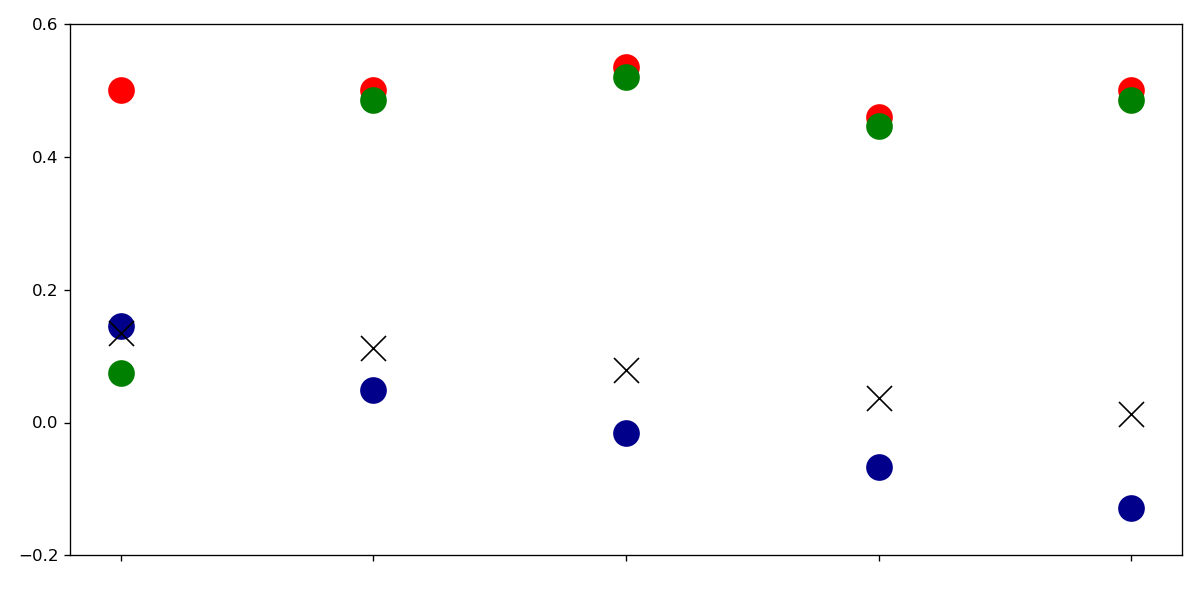

In [222]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
y_X_KK       = 1/1
y_X_f_1      = 1/2
y_X_f_2      = 1/2
y_X_r        = 1/1
y_T_KK_inter = 1/200
y_T_ex_KK    = 1/4
y_T_f        = 0
y_T_r        = 1/10
y_T_KK_intra = 1/25


ax.cla()
G_X_K        = 0.65
G_X_Kprime   = 0

def need(i, y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra):
    #數值解
    A = np.array([[-(y_X_KK+y_X_f_1+y_X_f_2+y_X_r), y_X_KK, 0, 0, 0, 0],
                 [y_X_KK, -(y_X_KK+y_X_f_1+y_X_f_2+y_X_r), 0, 0, 0, 0],
                 [y_X_f_2, 0, -(y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r), y_T_KK_inter, 0, 0],
                 [0, y_X_f_2, y_T_KK_inter, -(y_T_KK_inter+y_T_ex_KK+y_T_f+y_T_r), 0, 0],
                 [y_X_f_1, 0, y_T_f, y_T_ex_KK, -(y_T_KK_intra+y_T_r), y_T_KK_intra],
                 [0, y_X_f_1, y_T_ex_KK, y_T_f, y_T_KK_intra, -(y_T_KK_intra+y_T_r)]])
    G = np.array([G_X_K, G_X_Kprime, 0, 0, 0, 0])
    ans = np.linalg.inv(A).dot(-G)

    globals()['X']       = [(ans[0]-ans[1])/(ans[0]+ans[1])]
    globals()['T_inter'] = [(ans[2]-ans[3])/(ans[2]+ans[3])]
    globals()['T_intra'] = [(ans[4]-ans[5])/(ans[4]+ans[5])]
    globals()['T_tot']   = [(ans[2]+ans[4]-ans[3]-ans[5])/(ans[2]+ans[4]+ans[3]+ans[5])]
    print(globals()['X'], globals()['T_inter'], globals()['T_tot'], globals()['T_intra'])

    #繪製數值解
    Markersiz = 15
    ax.plot( i, globals()['X'], marker='o'      , linestyle='dotted', markersize=Markersiz  , color='r'         , linewidth=2, zorder=2)
    ax.plot( i, globals()['T_inter'], marker='o', linestyle='dotted', markersize=Markersiz  , color='green'     , linewidth=2, zorder=2)
    ax.plot( i, globals()['T_intra'], marker='o', linestyle='dotted', markersize=Markersiz  , color='darkblue'  , linewidth=2, zorder=2)
    ax.plot( i, globals()['T_tot'], marker='x'  , linestyle='dotted', markersize=Markersiz  , color='black'     , linewidth=2, zorder=2)
    # ax.plot( i, X_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, G_X_K, G_X_Kprime)                                                           , marker='X', linestyle='dotted', markersize=Markersiz+4, color='r'    , markeredgecolor='k', linewidth=1, zorder=2)
    # ax.plot( i, T_inter_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime), marker='X', linestyle='dotted', markersize=Markersiz+2, color='green', markeredgecolor='k', linewidth=1, zorder=2)
    # ax.plot( i, T_intra_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime), marker='X', linestyle='dotted', markersize=Markersiz  , color='blue' , markeredgecolor='k', linewidth=1, zorder=2)
    # ax.plot( i, T_tot_DoVP(y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra, G_X_K, G_X_Kprime)  , marker='X', linestyle='dotted', markersize=Markersiz  , color='black', markeredgecolor='k', linewidth=1, zorder=2)

for i in range(5):
    if (i == 0) :
        need(i, y_X_KK, y_X_f_1, y_X_f_2, y_X_r, 1, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra)
    elif (i == 1) :
        need(i, y_X_KK, y_X_f_1, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra)
    elif (i == 2) :
        need(i, y_X_KK, y_X_f_1, 0.8, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra)
    elif (i == 3) :
        need(i, y_X_KK, 0.2, y_X_f_2, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra)
    elif (i == 4) :
        need(i, y_X_KK, 0.2, 0.8, y_X_r, y_T_KK_inter, y_T_ex_KK, y_T_f, y_T_r, y_T_KK_intra)

#圖片設置
# ax.grid()
ax.set_xlim(-0.2, 4.2)
ax.set_ylim(-0.2, 0.6)
# ax.legend(['numerical $η^{X}$', 'numerical $η^{T,inter}$','numerical $η^{T,intra}$','numerical $η^{T,tot}$', 'analytic $η^{X}$', 'analytic $η^{T,inter}$','analytic $η^{T,intra}$','analytic $η^{T,tot}$'], fontsize=12, loc='lower left')
ax.set_xticks(np.arange(0, 5, 1), [' ', ' ', ' ', ' ', ' '])
ax.set_yticks(np.arange(-0.2, 0.7, 0.2))
plt.tight_layout()
plt.show()